<a href="https://colab.research.google.com/github/LeoncioMD/Examen/blob/main/microretailer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
files.upload()
#Cargar desde un archivo .csv sin indice
data=pd.read_csv('microretailer_mit_lift_lab.csv')
#verificamos info del data frame 
data.info()

Saving microretailer_mit_lift_lab.csv to microretailer_mit_lift_lab.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [2]:
#corroboramos valores nulos 
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

Sustucion de valores nulos 
en esta parte sustituiremos todos los valores nulos del data frame ocupando los metodos de backward y forward, es decir que se llenaran con los datos anteriores o posteriores y sespues comprobaremos que se hayan limpiado los datos 

In [3]:
#Remplazamos valores nulos del df comn "bfill"
data1=data.fillna(method="bfill")
data1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2.224524e+09,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data2=data1

In [6]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data1["234_willingness_participate_workshop"]=data1["234_willingness_participate_workshop"].fillna(method="bfill")

In [7]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
data1["234_willingness_participate_workshop"]=data1["234_willingness_participate_workshop"].fillna(method="ffill")

In [9]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data1["318_shopkeeper_name"]=data1["318_shopkeeper_name"].fillna(method="bfill")

In [8]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
data1["318_shopkeeper_name"]=data1["318_shopkeeper_name"].fillna(method="ffill")

In [10]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data1["319_shopkeepers_last_name"]=data1["319_shopkeepers_last_name"].fillna(method="bfill")

In [13]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
data2["319_shopkeepers_last_name"]=data2["319_shopkeepers_last_name"].fillna(method="ffill")

In [14]:
#Sustituir valores nulos por valores no nulo hacia atras "backward fill"("bfill")
data2["235_email"]=data2["235_email"].fillna(method="bfill")

In [15]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
data2["235_email"]=data2["235_email"].fillna(method="ffill")

In [17]:
#Sustituir valores nulos por valores no nulo hacia atras "forward fill"("ffill")
data2["236_whatsapp"]=data2["236_whatsapp"].fillna(method="ffill")

In [18]:
#Corroboramos valores nulos 
valores_nulos=data2.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [22]:
fitrocualitativo=data.iloc[:,[0,1,2,3,4,7,8,9,10,11,12,15,17,18,19,20,23,24,25,26,27,28,29,30,32,34,35,36,37,38,39,40,43,46,47,48,49,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96]]


In [21]:
fitrocuantitativo=data.iloc[:,[5,6,13,14,16,21,22,29,31,33,41,49,51,56,57,58,59,60,79,94]]

Valores atipicos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1080x576 with 0 Axes>

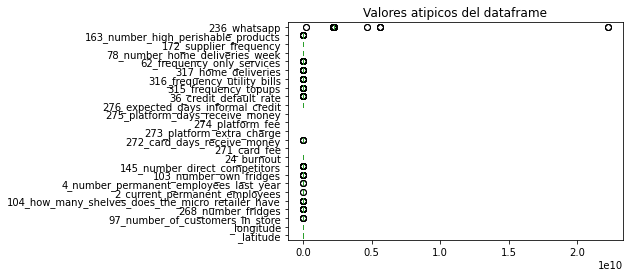

In [23]:
#realizamos diagrama de caja o bigote de cada columna 
fig=plt.figure(figsize=(15,8))
data2.plot(kind='box',vert=False)
plt.title("Valores atipicos del dataframe")
plt.show()

In [24]:
#Metodo aplicando la desviacion estandar. eencontramos los valores extremos 
y=fitrocuantitativo
Limite_superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                             19.111172
_longitude                                           -98.090304
97_number_of_customers_in_store                        6.591777
268_number_fridges                                    10.232148
104_how_many_shelves_does_the_micro_retailer_have     55.812917
2_current_permanent_employees                         16.463514
4_number_permanent_employees_last_year                16.004202
103_number_own_fridges                                14.643932
145_number_direct_competitors                         14.859475
24_burnout                                            10.758926
271_card_fee                                                NaN
276_expected_days_informal_credit                     53.403289
36_credit_default_rate                                 7.825516
315_frequency_topups                                  63.479354
316_frequency_utility_bills                          119.716775
317_home_deliv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [25]:
#EEncontramos los outlieas de data frame 
outliers=fitrocuantitativo[(y>Limite_superior)|(y<Limite_Inferior)]
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Obtenemos datos y los outliers se convierten en nulos del df
data3=fitrocuantitativo[(y<=Limite_superior)&(y>=Limite_Inferior)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,NaN,0.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,NaN,0.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19.042794,-98.193802,1.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,19.042809,-98.193439,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,19.042558,-98.193818,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Remlazamos valores atipico (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data.mean(),1))
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,2.5,0.0,4.2,NaN,10.0,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,NaN,15.0,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN


In [28]:
#metodo aplicando cuartiles Encuentro cuartiles 0.25 y 0.75
y=fitrocuantitativo

percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3
iqr= percentile75 - percentile25

Limite_superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                             19.111172
_longitude                                           -98.090304
97_number_of_customers_in_store                        6.591777
268_number_fridges                                    10.232148
104_how_many_shelves_does_the_micro_retailer_have     55.812917
2_current_permanent_employees                         16.463514
4_number_permanent_employees_last_year                16.004202
103_number_own_fridges                                14.643932
145_number_direct_competitors                         14.859475
24_burnout                                            10.758926
271_card_fee                                                NaN
276_expected_days_informal_credit                     53.403289
36_credit_default_rate                                 7.825516
315_frequency_topups                                  63.479354
316_frequency_utility_bills                          119.716775
317_home_deliv

In [29]:
#Encontramos outliears del df
outliers_iqr=fitrocuantitativo[(y>Limite_superior)|(y<Limite_Inferior)]
outliers_iqr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#obtenemos datos limpios 
data4_iqr=data3[(y<=Limite_superior)&(y>=Limite_Inferior)]
data4_iqr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,NaN,0.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,NaN,0.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19.042794,-98.193802,1.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,19.042809,-98.193439,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,19.042558,-98.193818,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#remplazamos los valores atipicos por nulos del df
data4_iqr=data3.copy()
data_iqr=data_clean.fillna(round(data4_iqr.mean(),1))
data_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,185_place_orders_suppliers,254_technology_roadmap
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
2,19.058655,-98.232300,0.0,0.0,24.0,2.0,2.0,2.5,0.0,4.2,NaN,10.0,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,NaN,15.0,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,NaN,NaN


In [32]:
#Convertir en dataframe
data_iqr.to_csv("Datos_limpios")
#descargamos archivo
from google.colab import files 

files.download("Datos_limpios")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>